In [1]:
import pandas as pd                ## 판다스 모듈을 사용한다

## 예제 11-1-1 html에서 테이블 데이터 가져오기

In [2]:
## url = 'http://www.fdic.gov/bank/individual/failed/banklist.html'        ##  데이터를 가져올 주소를 문자열로 입력한다

### 파일 주소를 변경

In [3]:
url = 'https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/'

In [4]:
dfs = pd.read_html(url)                                   ## read_html로 데이터를 읽어온다 

In [5]:
type(dfs)                                               ## 가져온 데이터는 리스트이다 

list

In [6]:
dfs = dfs[0]                                           ## 첫번째 데이터만 가져오면 데이터프레임이다 

In [7]:
dfs.head()                                 ## 데이터 중에 위세어 5개를 head 메소드로 조회한다 

,Bank Name,City,State,Cert,Acquiring Institution,Closing Date
0,Almena State Bank,Almena,KS,15426,Equity Bank,"October 23, 2020"
1,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb","October 16, 2020"
2,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.","April 3, 2020"
3,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020"
4,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019"


In [8]:
dfs.shape                                 ## 데이터의 형상을 확인한다 

(563, 6)

In [9]:
dfs.info()                                      ## 데이터프레임의 구성된 정보를 확인한다
                                                ## 열의 자료형과 메모리 사이즈 등을 알 수 있다 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              563 non-null    object
 1   City                   563 non-null    object
 2   State                  563 non-null    object
 3   Cert                   563 non-null    int64 
 4   Acquiring Institution  563 non-null    object
 5   Closing Date           563 non-null    object
dtypes: int64(1), object(5)
memory usage: 26.5+ KB


In [10]:
dfs['Closing Date'] = pd.to_datetime(dfs['Closing Date'])             ## 문자열을 날짜 형으로 변경한다 

In [11]:
## dfs['Updated Date'] = pd.to_datetime(dfs['Updated Date'])

In [12]:
dfs.head()

,Bank Name,City,State,Cert,Acquiring Institution,Closing Date
0,Almena State Bank,Almena,KS,15426,Equity Bank,2020-10-23
1,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb",2020-10-16
2,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.",2020-04-03
3,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,2020-02-14
4,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,2019-11-01


In [13]:
dfs.dtypes                                 ## 자료형을 확인하면 변경된 것을 알 수 있다 

Bank Name                        object
City                             object
State                            object
Cert                              int64
Acquiring Institution            object
Closing Date             datetime64[ns]
dtype: object

In [14]:
dfs['Closing Date'].dt                       ## 날짜형을 가지고 변경이나 조작이 필요한 경우에는 dt 객체를 사용한다 

In [15]:
dfs['year'] = dfs['Closing Date'].dt.strftime('%Y')        ## 연도만 추출해서 새로운 열을 만든다 

In [16]:
dfs.head()

,Bank Name,City,State,Cert,Acquiring Institution,Closing Date,year
0,Almena State Bank,Almena,KS,15426,Equity Bank,2020-10-23,2020
1,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb",2020-10-16,2020
2,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.",2020-04-03,2020
3,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,2020-02-14,2020
4,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,2019-11-01,2019


In [17]:
dfs['year'].value_counts().head()    ## 년도에 대한 값이 분포를 확인한다. 

2010    157
2009    140
2011     92
2012     51
2008     25
Name: year, dtype: int64

In [18]:
dfs.to_csv("failed_bank_list.csv")               ## 현재 데이터프레임을 csv 파일로 저장한다. 

In [20]:
dfs_ = pd.read_csv("failed_bank_list.csv", 
                   parse_dates=['Closing Date'])   ## 이번에는 문자열을 처음부터 날짜로 변환한다

In [21]:
dfs_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             563 non-null    int64         
 1   Bank Name              563 non-null    object        
 2   City                   563 non-null    object        
 3   State                  563 non-null    object        
 4   Cert                   563 non-null    int64         
 5   Acquiring Institution  563 non-null    object        
 6   Closing Date           563 non-null    datetime64[ns]
 7   year                   563 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 35.3+ KB


In [22]:
dfs_.head()

,Unnamed: 0,Bank Name,City,State,Cert,Acquiring Institution,Closing Date,year
0,0,Almena State Bank,Almena,KS,15426,Equity Bank,2020-10-23,2020
1,1,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb",2020-10-16,2020
2,2,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.",2020-04-03,2020
3,3,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,2020-02-14,2020
4,4,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,2019-11-01,2019


In [23]:
dfs_ = dfs_.drop('Unnamed: 0',1)          ## 필요없는 열을 삭제한다 

In [24]:
dfs_.head()

,Bank Name,City,State,Cert,Acquiring Institution,Closing Date,year
0,Almena State Bank,Almena,KS,15426,Equity Bank,2020-10-23,2020
1,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb",2020-10-16,2020
2,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.",2020-04-03,2020
3,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,2020-02-14,2020
4,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,2019-11-01,2019


In [25]:
%matplotlib inline                   

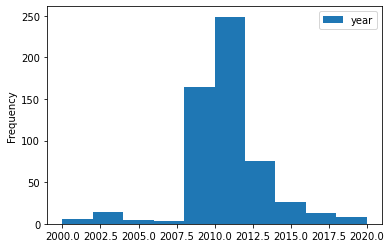

In [26]:
dfs_.plot(y='year',kind='hist')                           ## 년도 열을 기준으로 히스토그램 그래프를 그린다. 